## Exploratory Data Analysis (EDA) 
### Multi-Agent Reinforcement Learning in Supply Chain Optimization

**Author:** Thomas Hazenberg  
**Email:** thomas.hazenberg@student.uva.nl  
**Date:** 23 March 2025 
**GitHub Repository:** https://github.com/thomashz246/Master-Thesis

---

Other related datasets:
- Supply Chain Management (https://www.kaggle.com/datasets/lastman0800/supply-chain-management)
- M5 Forecasting (https://www.kaggle.com/competitions/m5-forecasting-accuracy/data?select=sell_prices.csv)

---

### 1. Introduction

This notebook presents an Exploratory Data Analysis (EDA) on the DataCo Smart Supply Chain dataset. The EDA serves as the starting point for my thesis, which focuses on simulating a supply chain environment suitable for Multi-Agent Reinforcement Learning (MARL).

Through this analysis, I aim to gain a deeper understanding of the structure, quality, and key patterns in the data. This includes identifying missing values, detecting outliers, and evaluating feature distributions. These insights guide future steps like feature selection, normalization, and environment design.

Interactive visualizations are used where appropriate to support interpretability. An external benchmark dataset will be added in a later stage for comparison and robustness.

### 1.1 Data Context

The DataCo Smart Supply Chain dataset is a highly detailed dataset designed to simulate real-world e-commerce operations. It includes more than 180,000 rows of transactional data and 50+ features, covering aspects such as customer segmentation, order quantities, discounts, shipping durations, product categories, and profitability metrics.

The dataset was created to support advanced data science projects in the domains of supply chain optimization, customer analytics, and operations research. Each row represents a single order item and includes variables like `Order Profit Per Order`, `Order Item Discount`, `Shipping Mode`, and customer metadata (e.g., `Market`, `Segment`, `Region`), making it suitable for modeling complex decision-making processes.

In the context of this thesis, the dataset serves as the basis for designing a simulated environment in which multiple autonomous agents can learn to optimize pricing, delivery logistics, and discount strategies. This aligns with the core objectives of **Multi-Agent Reinforcement Learning (MARL)**, which requires environments where agent actions influence shared outcomes like total profit, delivery times, and inventory turnover.

Due to its granularity and range of operational variables, the DataCo dataset provides a practical testbed for simulating multi-agent interactions in supply chain settings.

---

Importing all necessary packages and modules

In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
import plotly.express as px
import plotly.graph_objects as go

### Data Loading & Initial Exploration

To begin our analysis, we load the dataset using **Pandas**.  
Since the dataset contains textual data, we specify the `latin1`  **encoding** to ensure compatibility with special characters.

In [50]:
df = pd.read_csv("Data/DataCo Smart Supply Chain/DataCoSupplyChainDataset.csv", encoding='latin1')

---

### Corpus-Level Analysis

Before diving into detailed analysis, we inspect the dataset structure:
- **Shape:** Number of rows and columns
- **Info:** Data types and missing values
- **Head:** First 5 rows for an overview of the dataset

In [51]:
print("Dataset Shape:", df.shape)
print("-------------------------")
df.info()
print("-------------------------")
df.head()

Dataset Shape: (180519, 53)
-------------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 180519 entries, 0 to 180518
Data columns (total 53 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   Type                           180519 non-null  object 
 1   Days for shipping (real)       180519 non-null  int64  
 2   Days for shipment (scheduled)  180519 non-null  int64  
 3   Benefit per order              180519 non-null  float64
 4   Sales per customer             180519 non-null  float64
 5   Delivery Status                180519 non-null  object 
 6   Late_delivery_risk             180519 non-null  int64  
 7   Category Id                    180519 non-null  int64  
 8   Category Name                  180519 non-null  object 
 9   Customer City                  180519 non-null  object 
 10  Customer Country               180519 non-null  object 
 11  Customer Email                 180519

,Type,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Delivery Status,Late_delivery_risk,Category Id,Category Name,Customer City,...,Order Zipcode,Product Card Id,Product Category Id,Product Description,Product Image,Product Name,Product Price,Product Status,shipping date (DateOrders),Shipping Mode
0,DEBIT,3,4,91.250000,314.640015,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,2/3/2018 22:56,Standard Class
1,TRANSFER,5,4,-249.089996,311.359985,Late delivery,1,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/18/2018 12:27,Standard Class
2,CASH,4,4,-247.779999,309.720001,Shipping on time,0,73,Sporting Goods,San Jose,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/17/2018 12:06,Standard Class
3,DEBIT,3,4,22.860001,304.809998,Advance shipping,0,73,Sporting Goods,Los Angeles,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/16/2018 11:45,Standard Class
4,PAYMENT,2,4,134.210007,298.250000,Advance shipping,0,73,Sporting Goods,Caguas,...,NaN,1360,73,NaN,http://images.acmesports.sports/Smart+watch,Smart watch,327.75,0,1/15/2018 11:24,Standard Class


---

### Checking for Missing Values

Identifying missing values helps decide on the necessary data cleaning steps.

In [52]:
print("Missing values per column:")
print(df.isnull().sum()[df.isnull().sum() > 0])

Missing values per column:
Customer Lname              8
Customer Zipcode            3
Order Zipcode          155679
Product Description    180519
dtype: int64


Previously `df.info()`, and now `df.isnull().sum()` shows us that (almost) every feature/column has full non-null values except for **Product Description**. Also **Order Zipcode** only has 24.840 non-null values. Because they lack enough values, these features will be dropped.* The few values missing for **Customer Lname** and **Customer Zipcode** will not be dropped for this EDA but could later be dropped due to feature relevance.

###### *The relevancy of these features to the research of building an environment for multi-agent reinforcement learning is low, as they do not contribute meaningful information to agent-based decision-making or optimization strategies in a reinforcement learning framework. The **Product Description** column is purely textual and does not provide numerical or categorical insights relevant to modeling agent interactions, while **Order Zipcode** is highly sparse and likely does not add significant predictive value in the context of supply chain optimization or decision-making for multi-agent environments.

---

### Dropping empty columns and check for duplicates

Columns that have too many `NaN`-values are dropped and we check if there are duplicate rows in the dataset.

In [53]:
# Dropping entirely or almost empty columns
df.drop(columns=["Product Description"], inplace=True)
df.drop(columns=["Order Zipcode"], inplace=True)

# Checking for duplicates
print(f"Number of duplicate rows: {df.duplicated().sum()}")

Number of duplicate rows: 0


### Converting Date Columns to Datetime Format

In [76]:
# Ensuring date columns are in proper datetime format allows for time-based analysis.
df["order date (DateOrders)"] = pd.to_datetime(df["order date (DateOrders)"], errors='coerce')
df["shipping date (DateOrders)"] = pd.to_datetime(df["shipping date (DateOrders)"], errors='coerce')

## Univariate Analysis

---

### Summary Statistics

Generating summary statistics for numerical columns to understand distributions and ranges.

In [55]:
df.describe()

,Days for shipping (real),Days for shipment (scheduled),Benefit per order,Sales per customer,Late_delivery_risk,Category Id,Customer Id,Customer Zipcode,Department Id,Latitude,...,Order Item Profit Ratio,Order Item Quantity,Sales,Order Item Total,Order Profit Per Order,Product Card Id,Product Category Id,Product Price,Product Status,shipping date (DateOrders)
count,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180516.000000,180519.000000,180519.000000,...,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.000000,180519.0,180519
mean,3.497654,2.931847,21.974989,183.107609,0.548291,31.851451,6691.379495,35921.126914,5.443460,29.719955,...,0.120647,2.127638,203.772096,183.107609,21.974989,692.509764,31.851451,141.232550,0.0,2016-06-16 05:45:23.202433024
min,0.000000,0.000000,-4274.979980,7.490000,0.000000,2.000000,1.000000,603.000000,2.000000,-33.937553,...,-2.750000,1.000000,9.990000,7.490000,-4274.979980,19.000000,2.000000,9.990000,0.0,2015-01-03 00:00:00
25%,2.000000,2.000000,7.000000,104.379997,0.000000,18.000000,3258.500000,725.000000,4.000000,18.265432,...,0.080000,1.000000,119.980003,104.379997,7.000000,403.000000,18.000000,50.000000,0.0,2015-09-25 06:59:00
50%,3.000000,4.000000,31.520000,163.990005,1.000000,29.000000,6457.000000,19380.000000,5.000000,33.144863,...,0.270000,1.000000,199.919998,163.990005,31.520000,627.000000,29.000000,59.990002,0.0,2016-06-15 08:32:00
75%,5.000000,4.000000,64.800003,247.399994,1.000000,45.000000,9779.000000,78207.000000,7.000000,39.279617,...,0.360000,3.000000,299.950012,247.399994,64.800003,1004.000000,45.000000,199.990005,0.0,2017-03-04 21:29:00
max,6.000000,4.000000,911.799988,1939.989990,1.000000,76.000000,20757.000000,99205.000000,12.000000,48.781933,...,0.500000,5.000000,1999.989990,1939.989990,911.799988,1363.000000,76.000000,1999.989990,0.0,2018-02-06 22:14:00
std,1.623722,1.374449,104.433526,120.043670,0.497664,15.640064,4162.918106,37542.461122,1.629246,9.813646,...,0.466796,1.453451,132.273077,120.043670,104.433526,336.446807,15.640064,139.732492,0.0,NaN


### Histograms

Visualizing distributions of numerical features to understand spread and skewness.

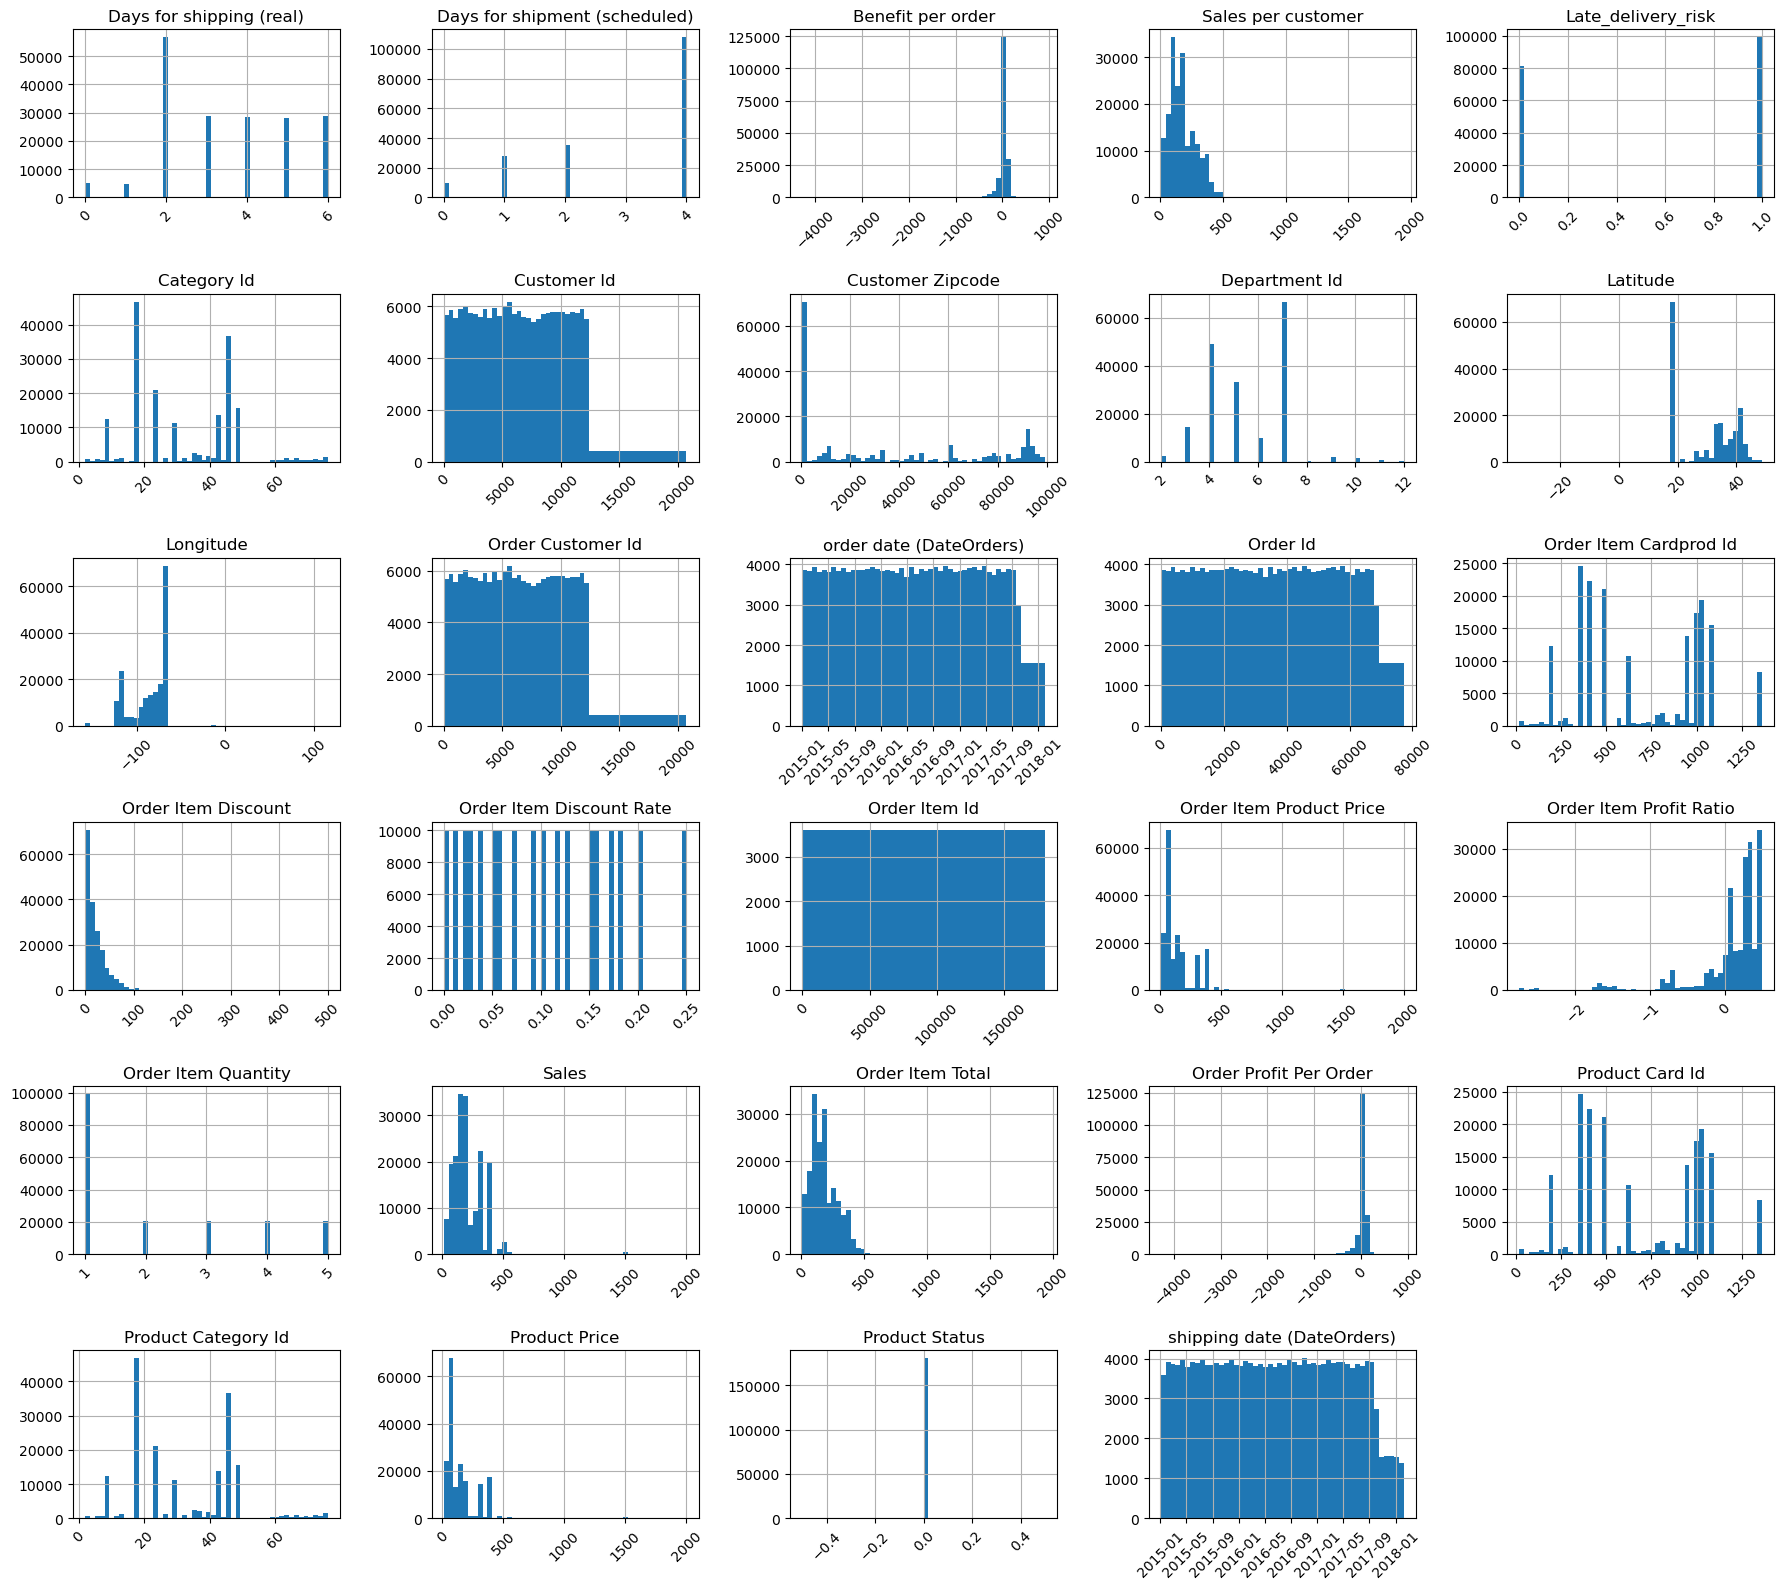

In [56]:
ax = df.hist(figsize=(18, 16), bins=50)
for subplot in ax.flatten():
    subplot.tick_params(axis='x', rotation=45)

plt.tight_layout()
plt.show()

### Boxplots

The boxplot below visualizes the distributions of key numerical features after applying a logarithmic scale to the y-axis. A log scale is used to compress extreme outliers and better reveal the underlying structure of the variant data, especially for features with long-tailed distributions such as `Sales` and `Order Profit Per Order`.

This plot allows us to:
- Identify features with high variability, such as `Benefit per order` and `Order Profit Per Order`.
- Observe skewness more clearly, particularly for pricing and profit-related features.
- Compare ranges across features with different units and magnitudes in a unified scale.

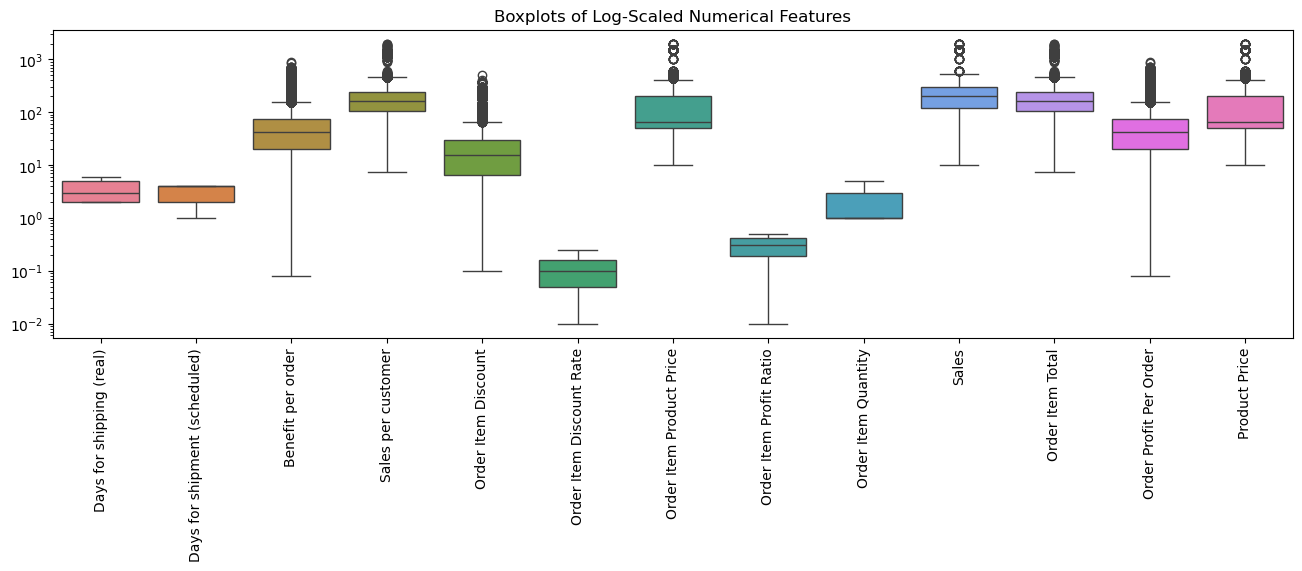

In [57]:
features_to_plot = [
    "Days for shipping (real)",
    "Days for shipment (scheduled)",
    "Benefit per order",
    "Sales per customer",
    "Order Item Discount",
    "Order Item Discount Rate",
    "Order Item Product Price",
    "Order Item Profit Ratio",
    "Order Item Quantity",
    "Sales",
    "Order Item Total",
    "Order Profit Per Order",
    "Product Price"
]

# Filter the dataframe to only positive values to avoid issues with log scale
df_filtered = df[features_to_plot].copy()
df_filtered = df_filtered[(df_filtered > 0).all(axis=1)]

# Plot
plt.figure(figsize=(16, 4))
sns.boxplot(data=df_filtered)
plt.yscale("log")
plt.xticks(rotation=90)
plt.title("Boxplots of Log-Scaled Numerical Features")
plt.show()

### **KDE Plots**

To explore the distribution of individual numerical features, we iterate through all columns of type `float64` or `int64` and visualize them using the most appropriate method based on their number of unique values:

- For **continuous numerical variables** (with more than 10 unique values), we use **Kernel Density Estimation (KDE) plots**. These smooth distributions give insights into the shape (such as skewness, modality) of the data and help detect long tails or unusual peaks.
- For **discrete or categorical numeric variables** (between 2 and 10 unique values), we use **bar plots**. These provide clear counts for each value, which is useful for binary indicators, status flags, or categorical encodings.
- Features with only a **single unique value** are skipped, as they contain no meaningful variation and would not produce an informative visualization.

This hybrid approach helps avoid inappropriate or unreadable plots (such as bar plots with hundreds of bars or KDE plots over binary variables) while ensuring that each feature is explored in the most insightful way.

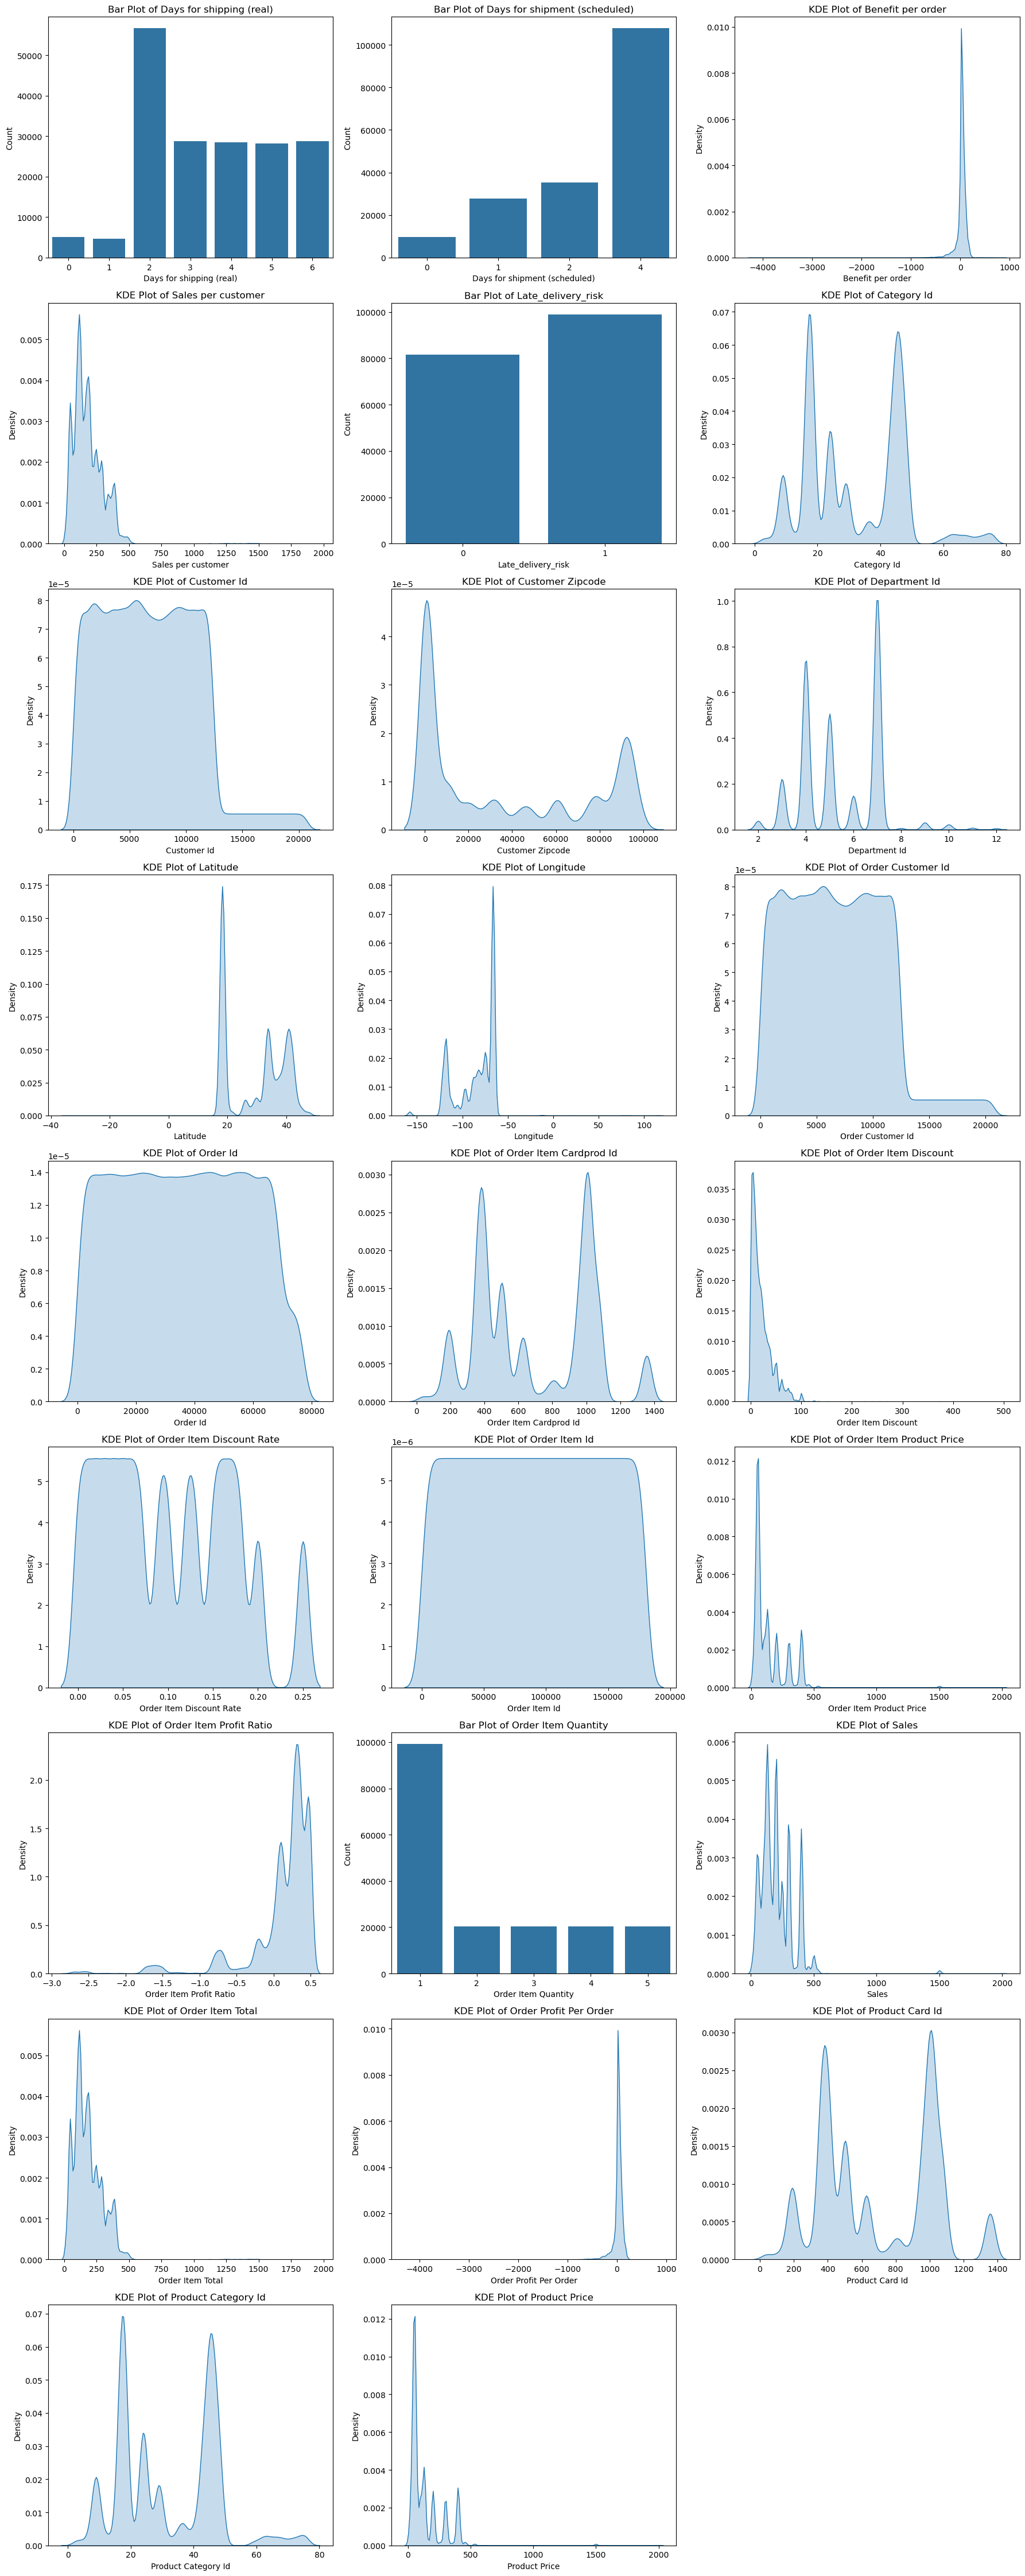

In [78]:
numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns

plots = []

for col in numeric_cols:
    unique = df[col].nunique()
    if unique > 1:
        plots.append(col)

n_rows = (len(plots) + 2) // 3
fig, axes = plt.subplots(n_rows, 3, figsize=(18, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(plots):
    unique_values = df[column].nunique()
    ax = axes[i]

    if unique_values > 10:
        sns.kdeplot(df[column], fill=True, ax=ax)
        ax.set_title(f"KDE Plot of {column}")
    else:
        sns.barplot(x=df[column].value_counts().index, 
                    y=df[column].value_counts().values, ax=ax)
        ax.set_title(f"Bar Plot of {column}")
        ax.set_xlabel(column)
        ax.set_ylabel("Count")

for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

plt.tight_layout()
plt.show()

---

### Baseline Model – Order Profit Distribution and Mean Prediction

To establish a foundational performance benchmark for predictive modeling, we begin by analyzing the distribution of the target variable: `Order Profit Per Order`. This variable represents the profit gained from individual order transactions and is central to the reward mechanism in the subsequent multi-agent reinforcement learning (MARL) framework. Understanding its statistical properties is critical for both feature engineering and model evaluation.

The histogram reveals that the distribution of `Order Profit Per Order` is heavily right-skewed, with the majority of values concentrated around zero, and a significant number of negative profit instances indicating losses. A long tail on the positive side also suggests the presence of a few highly profitable transactions. This skewness implies that standard regression models may be sensitive to outliers, and that normalization or transformation (e.g., log-scaling or winsorization) might be necessary to stabilize training dynamics in learning agents.

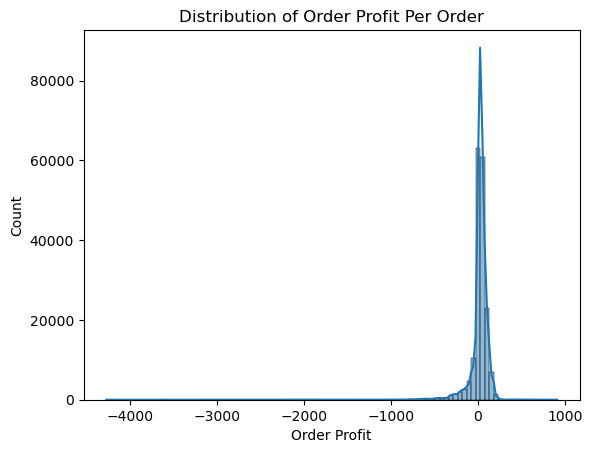

In [79]:
sns.histplot(df['Order Profit Per Order'], bins=100, kde=True)
plt.title("Distribution of Order Profit Per Order")
plt.xlabel("Order Profit")
plt.ylabel("Count")
plt.show()

As an initial benchmark, we construct a simple baseline model that predicts the mean of the target variable for all instances. This "mean-prediction" baseline serves two purposes: (1) it provides a lower-bound for model performance, and (2) it offers an interpretable measure of the inherent variability in the target. The baseline model is evaluated using **Mean Absolute Error (MAE)**, which quantifies the average magnitude of prediction error without considering its direction.

Results from the baseline model are:

- **Mean Predicted Order Profit:** $\$21.97$
- **Mean Absolute Error:** $\$56.09$

These figures indicate that, on average, predicting a constant profit of $\$21.97$ results in a deviation of approximately $\$56.09$ from the actual values per order. Any future model developed should outperform this benchmark to be considered effective.

This baseline not only offers a reference point for model evaluation but also supports early detection of modeling issues such as underfitting or lack of meaningful signal in the features. It is particularly important in this context, where the environment involves agent learning and decision-making based on profit-driven outcomes.

In [60]:
baseline_prediction = df['Order Profit Per Order'].mean()
baseline_mae = np.mean(np.abs(df['Order Profit Per Order'] - baseline_prediction))

print(f"Baseline Prediction (Mean Order Profit): {baseline_prediction:.2f}")
print(f"Baseline MAE: {baseline_mae:.2f}")

Baseline Prediction (Mean Order Profit): 21.97
Baseline MAE: 56.09


## Multivariate Analysis
---
### **Correlation Matrix of Selected Numerical Features**

This correlation matrix displays the Pearson correlation coefficients between the 13 selected numerical features that are most relevant for the downstream analysis and the multi-agent reinforcement learning (MARL) environment.

#### Focus of this matrix:
The selected features include measures of:
- **Time** (`Days for shipping`, `Days for shipment`)
- **Financial performance** (`Benefit per order`, `Order Profit Per Order`, `Sales`)
- **Pricing and discount behavior** (`Product Price`, `Order Item Discount`, `Discount Rate`)
- **Order characteristics** (`Order Item Quantity`, `Product Price`, `Order Item Total`)

#### Observations:

- **Strong positive correlations**:
  - `Sales`, `Sales per customer`, and `Order Item Total` are highly correlated with `Product Price` and `Order Profit Per Order` (r ≈ 0.75–0.99), indicating a strong dependency of revenue and profit on item pricing.
  - `Benefit per order` correlates highly with both `Order Item Product Price` and `Order Profit Per Order`, as expected given their relationship to overall profitability.
  - `Sales` and `Order Item Total` are almost perfectly correlated (r = 0.99), confirming they may be redundant for modeling.

- **Moderate correlations**:
  - `Order Item Discount` and `Order Item Profit Ratio` show a moderate relationship (r ≈ 0.63), possibly reflecting how discount strategies impact margin.
  - `Order Item Product Price` also shows strong correlation with `Product Price` (r = 0.79), which makes sense given the pricing structure of items vs. their listed product price.

- **Negative correlations**:
  - `Order Item Quantity` has a **negative correlation with `Product Price` and `Order Item Product Price`** (r ≈ –0.47), suggesting that larger quantities are more commonly ordered for cheaper products.
  - Discount rate does **not show strong correlation with profit**, indicating that discounts are applied broadly rather than strategically.


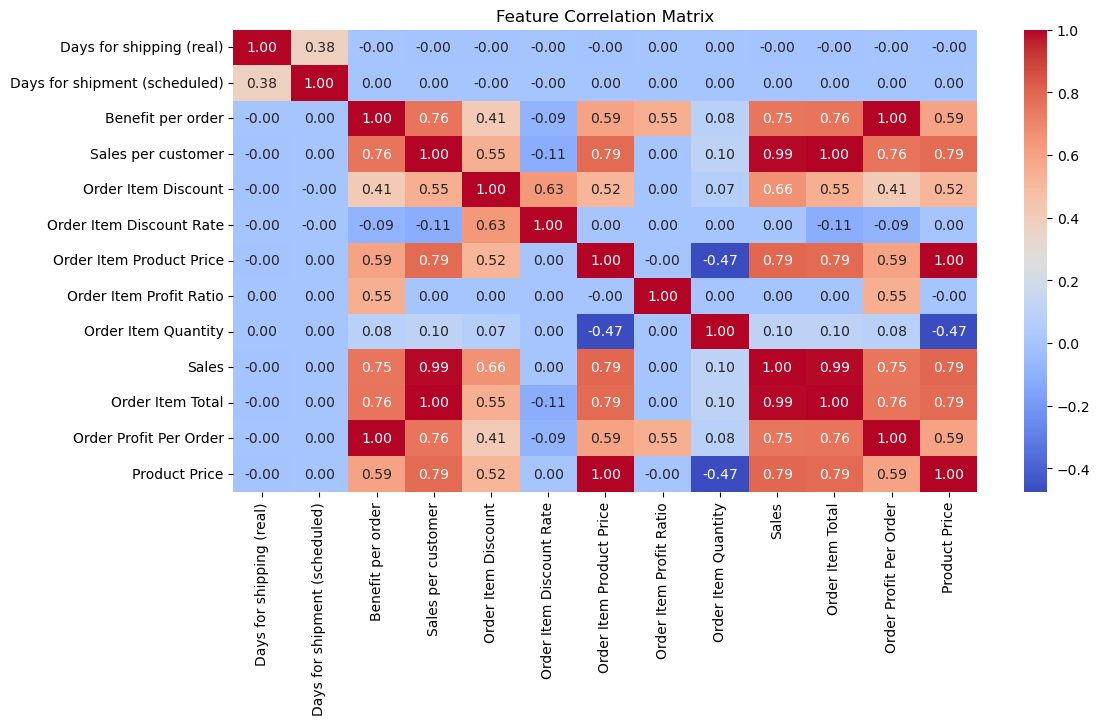

In [61]:
numeric_df = df.select_dtypes(include=['number'])
plt.figure(figsize=(12, 6))
sns.heatmap(df_filtered.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Matrix")
plt.show()

### **Pairplot**

The scatterplot matrix below visualizes the relationships between four key numeric features related to financial performance and order structure:

- `Sales`
- `Order Item Total`
- `Order Profit Per Order`
- `Order Item Quantity`

#### Observations:

- **Strong linear relationships** are visible between `Sales` and `Order Item Total`. This pattern confirm the strong correlations seen in the correlation matrix and suggest redundancy between these features.
- The relationship between `Order Profit Per Order` and the other variables appears more dispersed, with some clear **triangular structures**, possibly caused by negative or extreme outlier values. This suggests that profit is affected by **nonlinear factors** such as discounts or cost structure not shown in these plots.
- `Order Item Quantity` shows a **step-like distribution**, with values concentrated between 1 and 5. Its relationships with other variables are weaker, and often appear as vertical groupings, indicating it's likely not a strong linear driver of financial outcomes.
  

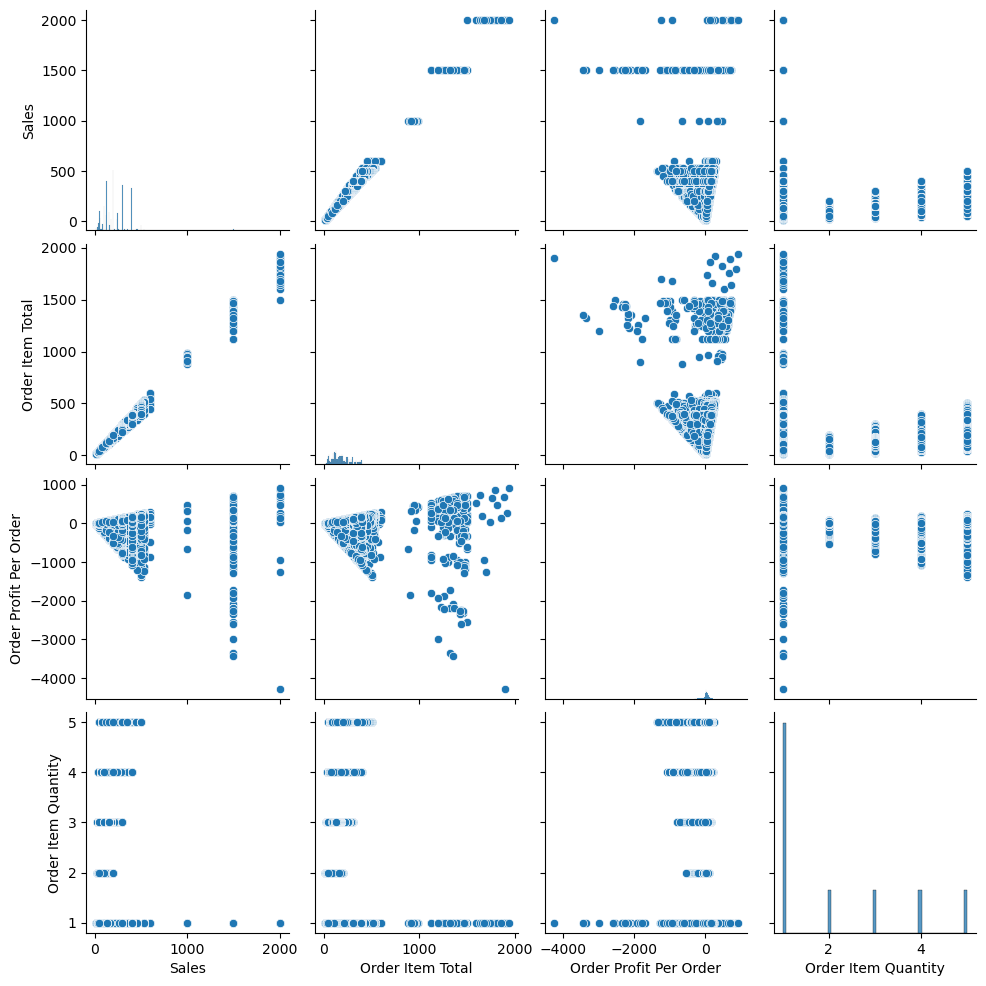

In [66]:
features = ['Sales', 'Order Item Total', 'Order Profit Per Order', 'Order Item Quantity']
sns.pairplot(df[features])
plt.show()

### Data Cleaning - Handling Missing Values

In [70]:
# Filling missing values using the median ensures the dataset remains balanced and avoids bias.
df[df.select_dtypes(include=['float64', 'int64']).columns] = df.select_dtypes(include=['float64', 'int64']).apply(lambda x: x.fillna(x.median()))

### Data Normalization - Standardization

In [71]:
# Standardization ensures all features are on a similar scale, improving model performance.
scaler = StandardScaler()
df_scaled = df.copy()
df_scaled[df.select_dtypes(include=['float64', 'int64']).columns] = scaler.fit_transform(df[df.select_dtypes(include=['float64', 'int64']).columns])

### Categorical Variable Analysis

In addition to numerical variables, categorical variables can provide valuable insights. We analyze how different categories impact the target variable (`Order Profit Per Order`). This is done by grouping and averaging them. 

In [69]:
category_features = ['Shipping Mode', 'Customer Segment']
for feature in category_features:
    print(f"Mean Order Profit grouped by {feature}:\n", df.groupby(feature)['Order Profit Per Order'].mean())
    print("\n")

Mean Order Profit grouped by Shipping Mode:
 Shipping Mode
First Class       23.122238
Same Day          20.850203
Second Class      21.305889
Standard Class    21.999169
Name: Order Profit Per Order, dtype: float64


Mean Order Profit grouped by Customer Segment:
 Customer Segment
Consumer       22.175390
Corporate      21.949204
Home Office    21.437359
Name: Order Profit Per Order, dtype: float64


